Question 2:
Wrangling the Billboard Top 100
Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

performer: who performed the song
song: the title of the song
year: year (1958 to 2021)
week: chart week of that year (1, 2, etc)
week_position: what position that song occupied that week on the Billboard top 100 chart.
Use your skills in data wrangling and plotting to answer the following three questions.

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)


In [40]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

billboard = pd.read_csv('billboard.csv')
relevant_columns = ["performer", "song", "year", "week", "week_position"]
billboard_relevant = billboard[relevant_columns]
billboard_filtered = billboard_relevant[(billboard_relevant['week_position'] <= 100) & (billboard_relevant['year'] >= 1958)]
billboard_top = billboard_filtered.groupby(['performer', 'song']).size().reset_index(name='count')
tenth_value = sorted(billboard_top['count'].unique(), reverse=True)[9]
billboard_top_10 = billboard_top[billboard_top['count'] >= tenth_value]
caption = "Imagine Dragons had the most popular song which was Radioactive and Carrie Underwoods's Before He Cheats was the least popular song."
display(Markdown(caption))
billboard_top_10.sort_values(by='count', ascending=False)[:10]


Imagine Dragons had the most popular song which was Radioactive and Carrie Underwoods's Before He Cheats was the least popular song.

,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
12026,Jason Mraz,I'm Yours,76
27121,The Weeknd,Blinding Lights,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.


There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.


In [2]:
df_unique= df[df['weeks_on_chart'] > 0]
df_unique = df[(df['year'] != 1958) & (df['year'] != 2021)]
df_unique= df_unique.groupby('year')['song_id'].nunique()
df_unique

,song_id
year,
1959,663
1960,700
1961,779
1962,768
1963,754
...,...
2016,530
2017,574
2018,704


Text(0.5, -0.02, 'Overall musical diversity has been extremely volatile. 2020 and 1970 appear to have the same amount of unique songs. There was a sudden increase in song diversity in 2010 after a large decrease between 1980-2000. Musical diversity appears to peak in 1966 and steadily decrease until 2010.')

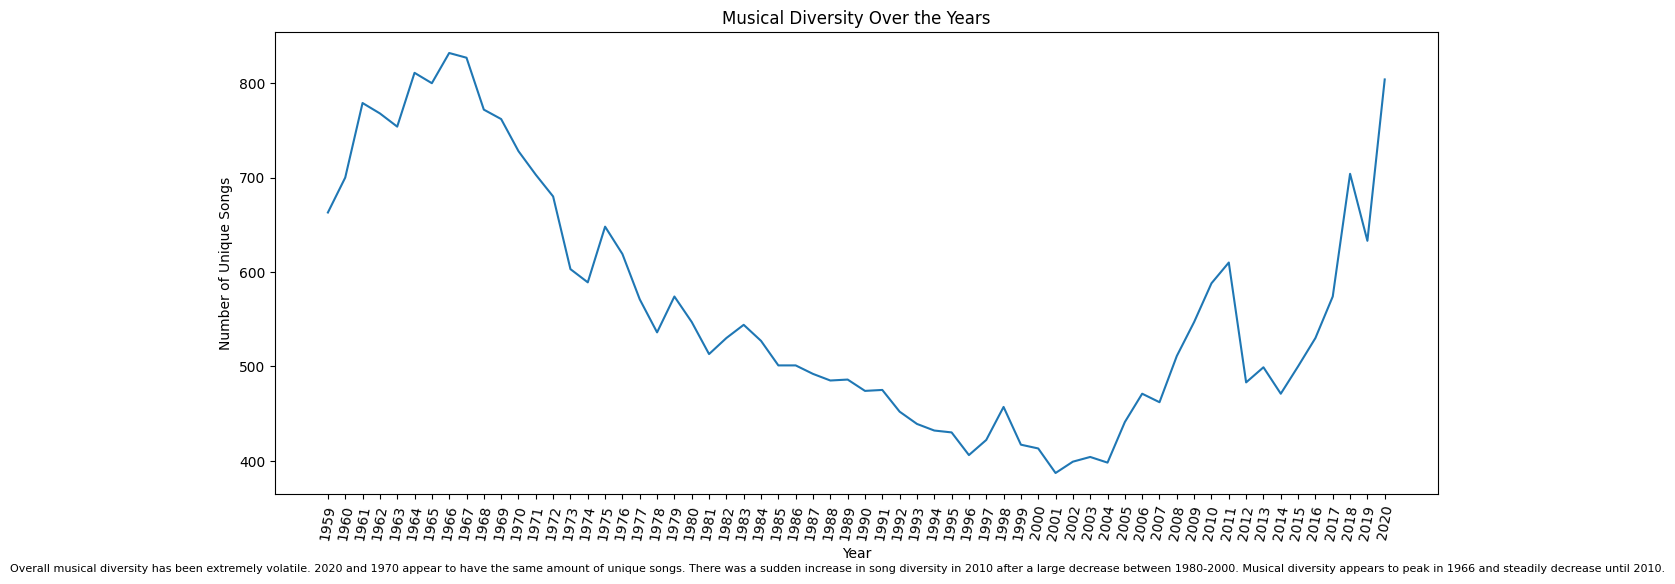

In [37]:
import matplotlib.pyplot as plt
df_unique.plot(kind= "line",figsize=(15, 6))
plt.title('Musical Diversity Over the Years')
plt.xticks(ticks=df_unique.index, rotation=80)
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.figtext(0.5,-0.02, "Overall musical diversity has been extremely volatile. 2020 and 1970 appear to have the same amount of unique songs. There was a sudden increase in song diversity in 2010 after a large decrease between 1980-2000. Musical diversity appears to peak in 1966 and steadily decrease until 2010.", ha= "center", fontsize=8)

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

In [4]:
df = df[df['weeks_on_chart'] >=10]
df
song_per_artist = df.groupby('performer')['song'].nunique()
song_per_artist = song_per_artist[song_per_artist >= 30]
song_per_artist.sort_values(ascending= False)

,song
performer,
Elton John,52
Madonna,44
Kenny Chesney,42
Tim McGraw,39
Keith Urban,36
Stevie Wonder,36
Taylor Swift,35
Michael Jackson,34
Rod Stewart,33


Text(0.4, -0.3, 'Elton John seems to have the most 10 week hits and there are four artists that have the same small number of 10 week hits (Daryl Oates, George Strait, Jason Aldean, Brad Paisley, and Neil Diamond). The rest of the graph is very similar in number of songs.')

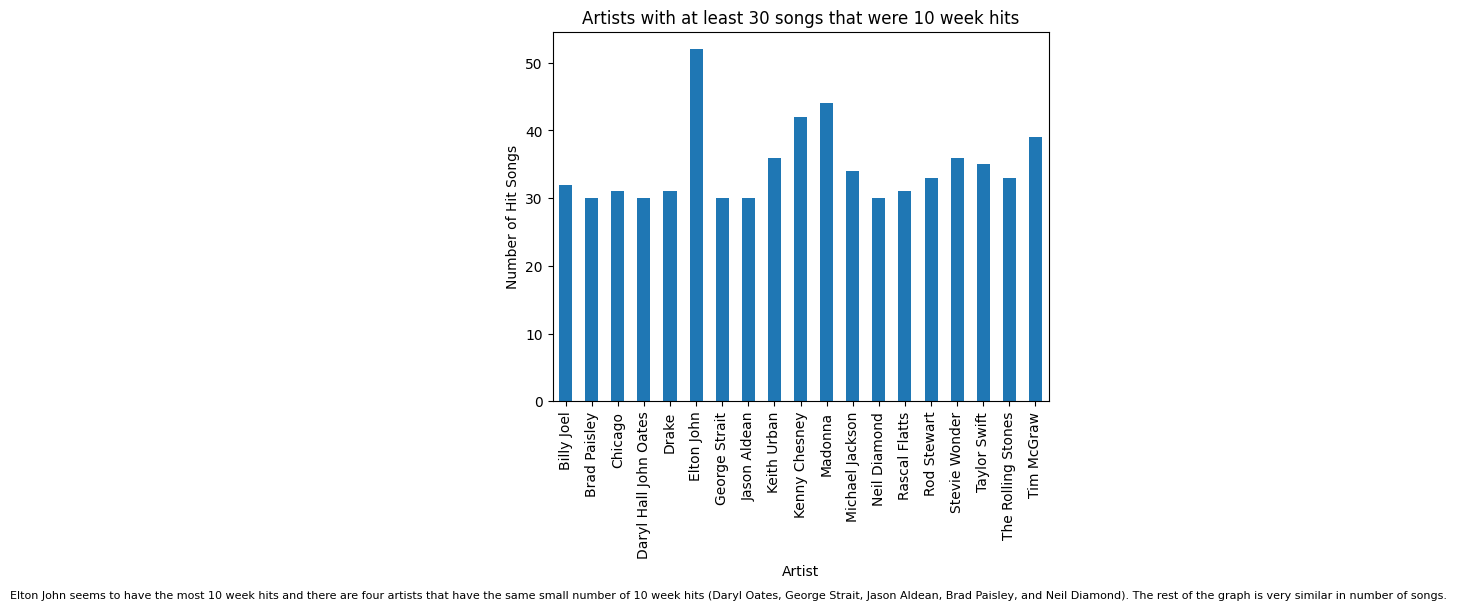

In [36]:
import matplotlib.pyplot as plt
song_per_artist.plot(kind= "bar")
plt.title('Artists with at least 30 songs that were 10 week hits')
plt.xlabel('Artist')
plt.ylabel('Number of Hit Songs')
plt.figtext(0.4,-0.3, "Elton John seems to have the most 10 week hits and there are four artists that have the same small number of 10 week hits (Daryl Oates, George Strait, Jason Aldean, Brad Paisley, and Neil Diamond). The rest of the graph is very similar in number of songs.", ha= "center", fontsize=8)
